## Mini Project III

In [112]:
import numpy as np
import pandas as pd
import requests as re
import json
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn import preprocessing
import plotly.graph_objects as go


In [2]:
accounts = pd.read_csv('data/twm_accounts.csv', sep = ';')
accounts.name = 'accounts' 
checking_acct = pd.read_csv('data/twm_checking_acct.csv', sep = ';')
checking_acct.name = 'checking_acct'
checking_tran = pd.read_csv('data/twm_checking_tran.csv', sep = ';')
checking_tran.name = 'checking_tran'
credit_acct = pd.read_csv('data/twm_credit_acct.csv', sep = ';')
credit_acct.name = 'credit_acct'
credit_tran = pd.read_csv('data/twm_credit_tran.csv', sep = ';')
credit_tran.name = 'credit_tran'
customer = pd.read_csv('data/twm_customer.csv', sep = ';')
customer.name = 'customer'
savings_acct = pd.read_csv('data/twm_savings_acct.csv', sep = ';')
savings_acct.name = 'savings_acct'
savings_tran = pd.read_csv('data/twm_savings_tran.csv', sep = ';')
savings_tran.name = 'savings_tran'
transactions = pd.read_csv('data/twm_transactions.csv', sep = ';')
transactions.name = 'transactions'

In [3]:
CSVs = [accounts,
checking_acct,
checking_tran,
credit_acct,
credit_tran,
customer,
savings_acct,
savings_tran,
transactions]

# Data Preview

## acounts

In [4]:
accounts.head(3)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00


## checking acct

In [5]:
checking_acct.head(3)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.0,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.0,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.0,Y,19.3.1994,NaN,2694.91,147.15


## checking tran

In [6]:
checking_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ


## credit acct

In [7]:
credit_acct.head(3)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68


## credit tran

In [8]:
credit_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ


## customer

In [9]:
customer.head(3)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA


## savings acct

In [10]:
savings_acct.head(3)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02


## savings tran

In [11]:
savings_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN


## transactions

In [12]:
transactions.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


## Demographic

In [13]:
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [14]:
# region = {eastern: 1, western: 2, middle: 3}
# region mapping

eastern = ['ME', 'NH', 'VT', 'NY', 'MA', 'RI', 'CT', 'NJ', 'PA', 'DE', 'MD', 'DC', 'MI', 'OH', 'IN', 'IL', 'WI', 'WV', 'VA', 'NC', 'TN', 'KY', 'SC', 'GA', 'AL', 'MS', 'FL']
western = ['AK', 'AZ' , 'CA', 'CO', 'HI', 'MT', 'ID', 'NV', 'NM' , 'OR', 'UT', 'WA', 'WY']

In [15]:
region = []
for state in customer['state_code']:
    if state[:2] in eastern:
        region.append(1) # adding eastern states
    elif state[:2] in western:
        region.append(2) # adding westeern states
    else:
        region.append(3) # adding middle states

In [16]:
region

[2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,


In [17]:
customer['state_code'].value_counts()

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
IN       16
OK       16
FL       16
OR       16
WI       15
MN       13
KY       13
HI       13
NJ       12
CO       11
NC        9
WA        9
MI        9
MA        8
MD        8
NM        7
DC        6
VA        5
AL        4
NV        4
NB        3
KS        3
LA        3
GA        2
Name: state_code, dtype: int64

# Checking for Null Values and Outliers

In [18]:
checking_acct.isnull().sum()

cust_id               0
acct_nbr              0
minimum_balance       0
per_check_fee         0
account_active        0
acct_start_date       0
acct_end_date       468
starting_balance      0
ending_balance        0
dtype: int64

In [19]:
customer.loc[:,['street_name','street_name','city_name','state_code']].isnull().any()

street_name    False
street_name    False
city_name      False
state_code     False
dtype: bool

In [20]:
customer.count()['cust_id']

747

In [21]:
savings_acct.count()['cust_id']

421

In [22]:
## They do not all have savings accounts

In [23]:
savings_acct[savings_acct['ending_balance'] == 0]

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance


In [24]:
##They all have money in it

In [25]:
customer_savings = savings_acct.loc[:,['cust_id','ending_balance']].reset_index(drop = True)

In [26]:
customer_savings

,cust_id,ending_balance
0,1363160,122.54
1,1362487,12.89
2,1362548,254.02
3,1362752,609.33
4,1363017,2901.35
...,...,...
416,1363141,528.57
417,1363038,508.26
418,1362529,873.14
419,1362895,96.25


In [27]:
credit_acct_without_empty = credit_acct.drop(credit_acct[credit_acct['ending_balance'] == 0].index.tolist())

In [28]:
customer_depth = credit_acct_without_empty.loc[:,['cust_id','ending_balance']].reset_index(drop = True)

In [29]:
customer_depth

,cust_id,ending_balance
0,1363160,286.69
1,1362487,1548.23
2,1362548,68.68
3,1363017,1000.00
4,1362609,3000.00
...,...,...
428,1363364,1785.97
429,1363467,1500.00
430,1363263,1218.94
431,1362569,9200.00


In [30]:
checking_acct['cust_id'].value_counts()[checking_acct['cust_id'].value_counts()>1]
## no customer have more then one credit account

credit_acct['cust_id'].value_counts()[credit_acct['cust_id'].value_counts()>1]
## no customer have more then one credit account

savings_acct['cust_id'].value_counts()[savings_acct['cust_id'].value_counts()>1]
## no customer have more then one savings account

customer_with_multiple_accounts = accounts['cust_id'].value_counts()[accounts['cust_id'].value_counts()>1].index.tolist()
## list of customer id with multiple different accounts (checking & saving included)

In [31]:
savings_acct.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [32]:
checking_acct['cust_id'].value_counts()[checking_acct['cust_id'].value_counts()>1]

Series([], Name: cust_id, dtype: int64)

In [33]:
credit_acct['cust_id'].value_counts()[credit_acct['cust_id'].value_counts()>1]

Series([], Name: cust_id, dtype: int64)

In [34]:
savings_acct['cust_id'].value_counts()[savings_acct['cust_id'].value_counts()>1]

Series([], Name: cust_id, dtype: int64)

In [35]:
customer_with_multiple_accounts

[1362991,
 1362924,
 1362929,
 1362933,
 1362936,
 1362939,
 1362945,
 1362949,
 1362950,
 1362952,
 1362964,
 1362966,
 1362973,
 1362978,
 1362980,
 1362985,
 1362986,
 1362990,
 1363493,
 1362995,
 1362997,
 1362926,
 1362920,
 1363006,
 1362918,
 1362825,
 1362829,
 1362830,
 1362835,
 1362836,
 1362837,
 1362839,
 1362844,
 1362850,
 1362853,
 1362857,
 1362858,
 1362864,
 1362875,
 1362877,
 1362881,
 1362902,
 1362904,
 1362905,
 1363004,
 1363008,
 1363216,
 1363130,
 1363138,
 1363140,
 1363142,
 1363147,
 1363158,
 1363164,
 1363165,
 1363169,
 1363173,
 1363187,
 1363193,
 1363195,
 1363197,
 1363199,
 1363200,
 1363201,
 1363205,
 1363209,
 1363210,
 1363133,
 1363128,
 1363010,
 1363126,
 1363011,
 1363017,
 1363018,
 1363022,
 1363035,
 1363037,
 1363038,
 1363043,
 1363060,
 1363070,
 1363071,
 1363078,
 1363081,
 1363083,
 1363088,
 1363093,
 1363097,
 1363108,
 1363117,
 1362823,
 1362822,
 1362817,
 1362578,
 1362584,
 1362587,
 1362588,
 1362594,
 1362602,
 1362605,


# Final Dataframe

In [88]:
final_dataFrame = customer.loc[:,['cust_id','age','income','gender']]
final_dataFrame.replace(['M ', 'F '], [1, 0], inplace=True)
final_dataFrame

,cust_id,age,income,gender
0,1362691,46,26150,1
1,1362487,71,6605,1
2,1363160,38,18548,0
3,1362752,54,47668,0
4,1362548,59,44554,0
...,...,...,...,...
742,1363324,36,14795,0
743,1362895,56,26387,1
744,1362569,50,61300,1
745,1363364,37,15100,0


In [89]:
checking_accounts = checking_acct.loc[:,['cust_id','ending_balance']]
saving_accounts = savings_acct.loc[:,['cust_id','ending_balance']]
credit_accounts = credit_acct.loc[:,['cust_id','ending_balance']]

checking_accounts = checking_accounts.rename(columns = {'ending_balance':'checking'})
saving_accounts = saving_accounts.rename(columns = {'ending_balance':'savings'})
credit_accounts = credit_accounts.rename(columns = {'ending_balance':'credit'})

customer_netWorth = checking_accounts.merge(saving_accounts,how='outer', on='cust_id')
customer_netWorth = customer_netWorth.merge(credit_accounts,how='outer', on='cust_id')

customer_netWorth.replace([np.nan],[0], inplace=True)
customer_netWorth

,cust_id,checking,savings,credit
0,1362548,569.65,254.02,68.68
1,1362487,1401.21,12.89,1548.23
2,1363017,147.15,2901.35,1000.00
3,1362752,3.76,609.33,0.00
4,1363282,84.18,0.00,272.69
...,...,...,...,...
660,1363206,0.00,0.00,5490.45
661,1363204,0.00,0.00,1200.00
662,1362775,0.00,0.00,629.25
663,1362714,0.00,0.00,457.29


In [90]:
customer_netWorth['net_worth'] = customer_netWorth['checking'] + customer_netWorth['savings'] - customer_netWorth['credit']
customer_netWorth

,cust_id,checking,savings,credit,net_worth
0,1362548,569.65,254.02,68.68,754.99
1,1362487,1401.21,12.89,1548.23,-134.13
2,1363017,147.15,2901.35,1000.00,2048.50
3,1362752,3.76,609.33,0.00,613.09
4,1363282,84.18,0.00,272.69,-188.51
...,...,...,...,...,...
660,1363206,0.00,0.00,5490.45,-5490.45
661,1363204,0.00,0.00,1200.00,-1200.00
662,1362775,0.00,0.00,629.25,-629.25
663,1362714,0.00,0.00,457.29,-457.29


In [92]:
final_dataFrame['net_worth'] = final_dataFrame.merge(customer_netWorth, how='outer', on='cust_id')['net_worth']

In [93]:
final_dataFrame['net_worth'].replace(np.nan, 0, inplace=True)
final_dataFrame

,cust_id,age,income,gender,net_worth
0,1362691,46,26150,1,0.00
1,1362487,71,6605,1,-134.13
2,1363160,38,18548,0,-164.15
3,1362752,54,47668,0,613.09
4,1362548,59,44554,0,754.99
...,...,...,...,...,...
742,1363324,36,14795,0,2325.37
743,1362895,56,26387,1,-1203.75
744,1362569,50,61300,1,-9153.52
745,1363364,37,15100,0,-1489.69


In [94]:
final_dataFrame['region'] = region
final_dataFrame.drop('cust_id', axis=1, inplace=True)

In [95]:
final_dataFrame

,age,income,gender,net_worth,region
0,46,26150,1,0.00,2
1,71,6605,1,-134.13,2
2,38,18548,0,-164.15,2
3,54,47668,0,613.09,2
4,59,44554,0,754.99,1
...,...,...,...,...,...
742,36,14795,0,2325.37,2
743,56,26387,1,-1203.75,1
744,50,61300,1,-9153.52,2
745,37,15100,0,-1489.69,1


In [96]:
# normalize

scaler = StandardScaler()

columns = final_dataFrame.iloc[:, :-1].columns.tolist()

min_max_scaler = preprocessing.MinMaxScaler()
final_df_minmax = pd.DataFrame(min_max_scaler.fit_transform(final_dataFrame.iloc[:, :-1]), columns=columns)
final_df_minmax

,age,income,gender,net_worth
0,0.434211,0.181399,1.0,0.254787
1,0.763158,0.045818,1.0,0.251054
2,0.328947,0.128665,0.0,0.250218
3,0.539474,0.330667,0.0,0.271853
4,0.605263,0.309066,0.0,0.275802
...,...,...,...,...
742,0.302632,0.102631,0.0,0.319514
743,0.565789,0.183043,1.0,0.221281
744,0.486842,0.425231,1.0,0.000000
745,0.315789,0.104747,0.0,0.213322


In [97]:
final_df_minmax['region'] = final_dataFrame['region']
final_df_minmax

,age,income,gender,net_worth,region
0,0.434211,0.181399,1.0,0.254787,2
1,0.763158,0.045818,1.0,0.251054,2
2,0.328947,0.128665,0.0,0.250218,2
3,0.539474,0.330667,0.0,0.271853,2
4,0.605263,0.309066,0.0,0.275802,1
...,...,...,...,...,...
742,0.302632,0.102631,0.0,0.319514,2
743,0.565789,0.183043,1.0,0.221281,1
744,0.486842,0.425231,1.0,0.000000,2
745,0.315789,0.104747,0.0,0.213322,1


In [99]:
final_df_east = final_df_minmax[final_df_scaled['region'] == 1]
final_df_east

,age,income,gender,net_worth,region
4,0.605263,0.309066,0.0,0.275802,1
5,0.526316,0.108798,0.0,0.254787,1
10,0.210526,0.179173,0.0,0.249540,1
14,0.500000,0.161983,0.0,0.254787,1
17,0.052632,0.000000,1.0,0.293042,1
...,...,...,...,...,...
735,0.644737,0.030737,1.0,0.280855,1
736,0.460526,0.204784,0.0,0.214662,1
738,0.486842,0.092045,1.0,0.220858,1
743,0.565789,0.183043,1.0,0.221281,1


In [100]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



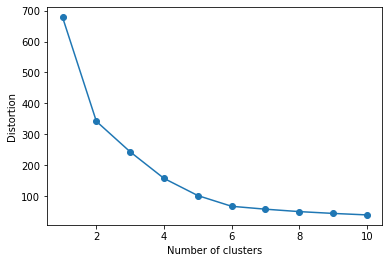

In [101]:
# elbow rule
plot_distortion(final_df_minmax, max_clusters=10)

In [102]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(final_df_east)

In [104]:
final_df_east['cluster'] = y_km
final_df_east

<ipython-input-104-82ea0d0d99ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,income,gender,net_worth,region,cluster
4,0.605263,0.309066,0.0,0.275802,1,2
5,0.526316,0.108798,0.0,0.254787,1,2
10,0.210526,0.179173,0.0,0.249540,1,3
14,0.500000,0.161983,0.0,0.254787,1,2
17,0.052632,0.000000,1.0,0.293042,1,1
...,...,...,...,...,...,...
735,0.644737,0.030737,1.0,0.280855,1,4
736,0.460526,0.204784,0.0,0.214662,1,2
738,0.486842,0.092045,1.0,0.220858,1,4
743,0.565789,0.183043,1.0,0.221281,1,4


In [105]:
final_df_east_cluster = final_df_east.groupby('cluster').mean()
final_df_east_cluster.drop('region', axis=1, inplace=True)
final_df_east_cluster

,age,income,gender,net_worth
cluster,,,,
0,0.726316,0.083604,0.0,0.259424
1,0.202199,0.136921,1.0,0.266785
2,0.438910,0.276647,0.0,0.271980
3,0.140825,0.063242,0.0,0.266919
4,0.641754,0.239839,1.0,0.271616


In [106]:
final_df_east_cluster.columns.tolist()

['age', 'income', 'gender', 'net_worth']

In [114]:
a = final_df_east_cluster.iloc[0].values.tolist()
b = final_df_east_cluster.iloc[1].values.tolist()
c = final_df_east_cluster.iloc[2].values.tolist()
d = final_df_east_cluster.iloc[3].values.tolist()
e = final_df_east_cluster.iloc[4].values.tolist()

theta = final_df_east_cluster.columns.tolist()

# fig = px.line_polar(final_df_east_cluster, r=r, theta=theta, line_close=True, range_r=[0, 1])
# fig.update_traces(fill='toself')

# fig.show()
#######

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=a,
      theta=theta,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=b,
      theta=theta,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=c,
      theta=theta,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=d,
      theta=theta,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=e,
      theta=theta,
      fill='toself',
      name='Cluster 1'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()